# Data Science Workshop!

First, we'll download the dataset. This is data from the [TMDb 5000 movies dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv).  

(use shift-enter or click the play button to run a cell)


### Setup

We want to import some useful python libraries.

Numpy is a library that adds a lot more math / linear algebra capabilities to python, such as arrays.

Pandas is a library that provides tools for data strucures and data analysis.

Here is the [documentation](http://pandas.pydata.org/pandas-docs/stable/) for Pandas.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ayshaC/Data-Science-Workshop/master/tmdb_5000_movies.csv')

### Data Overview

In [10]:
# Let's take a look at the data! df.head() shows us the first few rows in the table. Take a look at all the columns. 
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [13]:
# So we know there should be exactly 5000 rows of data, but we can check with "shape". df.shape gives us (rows, columns) of the dataframe.
df.shape

(4803, 20)

In [16]:
# We can see more statistical details about the NUMERICAL COLUMNS in the movie dataframe. 
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Selecting Data

In [27]:
# The original table has a lot of columns, so let's just select a few we're interested in. 
df_reduced=df[['budget', 'homepage', 'original_language', 'title', 'popularity', 'release_date', 'revenue', 'runtime']]
df_reduced.shape

(4803, 8)

In [33]:
# We can also select rows with null values. Let's see how many don't have a homepage
df_reduced[df['homepage'].isnull()].head()

,budget,homepage,original_language,title,popularity,release_date,revenue,runtime
15,225000000,NaN,en,The Chronicles of Narnia: Prince Caspian,53.978602,2008-05-15,419651413,150.0
24,207000000,NaN,en,King Kong,61.226010,2005-12-14,550000000,187.0
27,209000000,NaN,en,Battleship,64.928382,2012-04-11,303025485,131.0
33,210000000,NaN,en,X-Men: The Last Stand,3.857526,2006-05-24,459359555,104.0
34,200000000,NaN,en,Monsters University,89.186492,2013-06-20,743559607,104.0


In [35]:
# How many movies don't have a homepage recorded in this database?

x=len(df_reduced[df['homepage'].isnull()])
print(x, "movies don't have a homepage recorded in this database")

3091 movies don't have a homepage recorded in this database


In [43]:
# Let's take a look at all of the languages in the dataset
df_reduced['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [40]:
# We can group the data by language. Here, we see all of the languages and a count of their instances in the dataframe.
df_reduced.groupby('original_language')['title'].count().sort_values(ascending=False)

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ro       2
id       2
ta       2
cs       2
ar       2
te       1
tr       1
vi       1
el       1
hu       1
is       1
sl       1
xx       1
ky       1
nb       1
no       1
pl       1
ps       1
af       1
Name: title, dtype: int64

In [41]:
# We can get all of the rows for a specific language!
df_reduced['original_language' == 'en']

KeyError: False

### Adding data

In [44]:
# Let's add a new column to identify movies we like. 
df_reduced['i_like']=None
df_reduced.head()

/Users/jshrivastava/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,budget,homepage,original_language,title,popularity,release_date,revenue,runtime,i_like
0,237000000,http://www.avatarmovie.com/,en,Avatar,150.437577,2009-12-10,2787965087,162.0,None
1,300000000,http://disney.go.com/disneypictures/pirates/,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,None
2,245000000,http://www.sonypictures.com/movies/spectre/,en,Spectre,107.376788,2015-10-26,880674609,148.0,None
3,250000000,http://www.thedarkknightrises.com/,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,None
4,260000000,http://movies.disney.com/john-carter,en,John Carter,43.926995,2012-03-07,284139100,132.0,None


In [47]:
# Update the column for a movie you like! 
df_reduced.loc[df_reduced['title'] == 'Interstellar', ['i_like']] = True

/Users/jshrivastava/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [48]:
df_reduced[df_reduced['title']=='Interstellar']

,budget,homepage,original_language,title,popularity,release_date,revenue,runtime,i_like
95,165000000,http://www.interstellarmovie.net/,en,Interstellar,724.247784,2014-11-05,675120017,169.0,True


## Graphing Data

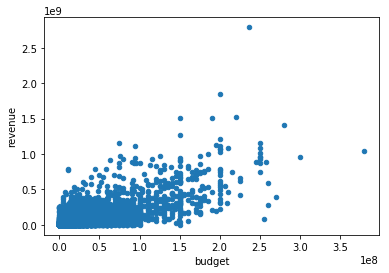

In [49]:
# Let's take a look at the relationship between a movie's budget and its revenue. 
df_reduced.plot.scatter(x='budget', y='revenue')
#(x='budget', y='revenue')

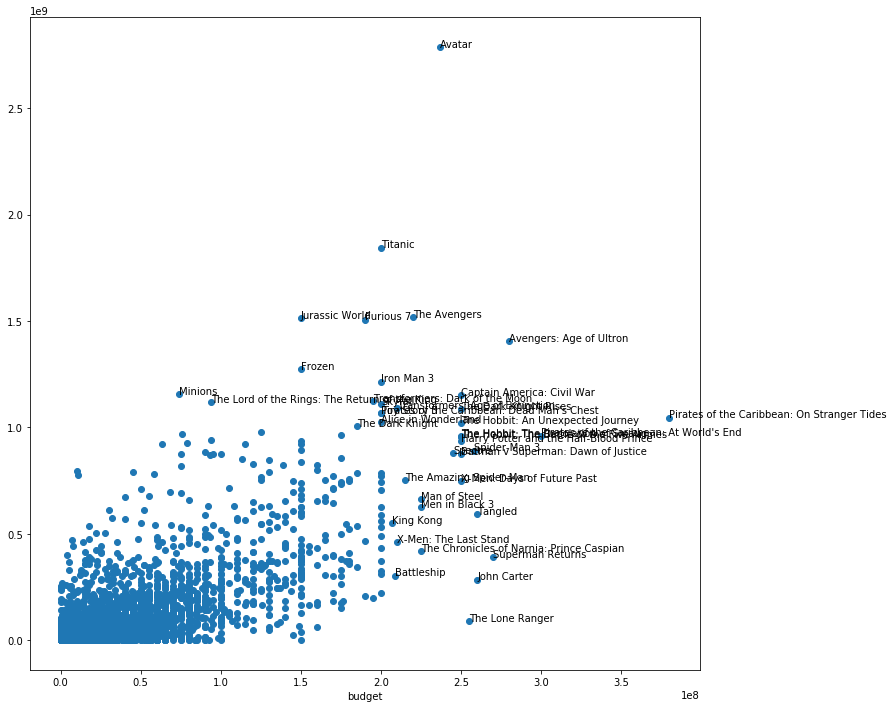

In [50]:
# This just adds labels to some of the points 

ax = df.set_index('budget')['revenue'].plot(style='o', figsize=(12,12))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
      if(point['x'] > 200000000 or point['y'] > 1000000000):
        ax.text(point['x'], point['y'], str(point['val']))      
     
        
label_point(df.budget, df.revenue, df.title, ax)


In [51]:
# Now let's see how long movies tend to be
df_reduced['runtime'].hist(bins=20)

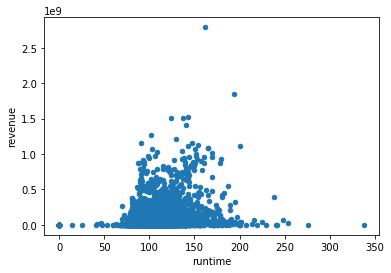

In [55]:
# So how long should your movie be if you want to make the most money?

df_reduced.plot.scatter(x='runtime', y='revenue')

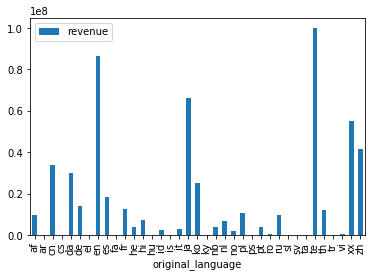

In [58]:
# Which language should your movie be in to make the most money? (hint: it's not English)

df_reduced.groupby('original_language')['original_language', 'revenue'].mean().plot.bar()